# Computer game data research

Historical data on game sales, user and expert evaluations, genres and platforms (e.g. Xbox or PlayStation) are available from open sources. We need to identify the patterns that determine a game's success. This will allow us to bet on a potentially popular product and plan advertising campaigns for the online store Stream, which sells computer games around the world.
We have the data in front of us through 2016. In the data set comes the acronym ESRB (Entertainment Software Rating Board), an association that determines the age rating of computer games. The ESRB evaluates game content and assigns it an appropriate age category, such as "For Adults," "For Young Children," or "For Teens.

## Open the data file and examine the basic information

Import pandas, numpy, matplotlib.pyplot, seaborn, and scipy libraries. We read the data from the csv-file into the dataframe and save it to the variable data. Print the first 10 rows of the table:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbrn
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv(r'C:\Users\Julia\Desktop\DATA_SCIENCE\Datasets\games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Let's build a common histogram for all numeric columns of the table:

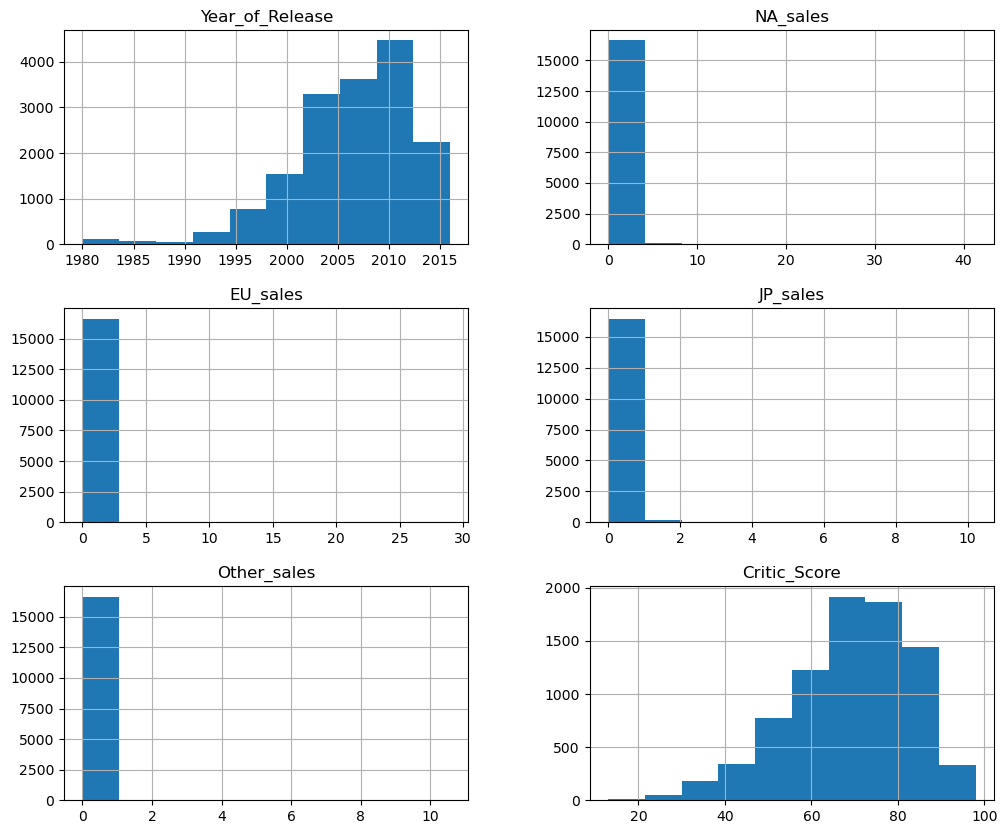

In [3]:
data.hist(figsize=(12, 10),bins=10);

Let's output the basic information using the info() method and check the data for obvious duplicates:

In [4]:
print('Number of obvious duplicates:', data.duplicated().sum())
print()
data.info()

Number of obvious duplicates: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Conclusion:** In the data obtained in the study of information stands out the presence of missing values, writing columns not in lowercase, the wrong types of data values. The number of obvious duplicates is not found, histograms require more detailed analysis.

## Preprocessing data

Replace the names of the columns with the correct ones (lowercase) and explaining in what values the data are represented:

In [5]:
data.columns = data.columns.str.lower()
data.rename(columns = {'na_sales': 'na_sales_mln_copies',\
                       'eu_sales':'eu_sales_mln_copies',\
                       'jp_sales':'jp_sales_mln_copies',\
                       'other_sales':'other_sales_mln_copies',\
                       'critic_score': 'critic_score_out_of_100',\
                       'user_score': 'user_score_out_of_10'},inplace=True)
data.tail(5)

,name,platform,year_of_release,genre,na_sales_mln_copies,eu_sales_mln_copies,jp_sales_mln_copies,other_sales_mln_copies,critic_score_out_of_100,user_score_out_of_10,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


There are missing values in the data, let's print the number of missing values for each column:

In [6]:
data.isna().sum()

name                          2
platform                      0
year_of_release             269
genre                         2
na_sales_mln_copies           0
eu_sales_mln_copies           0
jp_sales_mln_copies           0
other_sales_mln_copies        0
critic_score_out_of_100    8578
user_score_out_of_10       6701
rating                     6766
dtype: int64

There are only 2 missing values in the `name` column, let's see what these rows contain:

In [7]:
data[data['name'].isnull() == True]

,name,platform,year_of_release,genre,na_sales_mln_copies,eu_sales_mln_copies,jp_sales_mln_copies,other_sales_mln_copies,critic_score_out_of_100,user_score_out_of_10,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Both games are from 1993 with the GEN platform, which has already lost its relevance, the information in the remaining columns is not significant, so let's delete these lines. This type of omission is completely random.

In [8]:
data = data.dropna(subset=['name'])
data.isna().sum()

name                          0
platform                      0
year_of_release             269
genre                         0
na_sales_mln_copies           0
eu_sales_mln_copies           0
jp_sales_mln_copies           0
other_sales_mln_copies        0
critic_score_out_of_100    8576
user_score_out_of_10       6699
rating                     6764
dtype: int64

We will also remove the rows with skipped values of the `year of release` column. This type of skip is completely random. It cannot be replaced with other values, because the release of the same game on different platforms happens at different times.

In [9]:
data = data.dropna(subset=['year_of_release'])
data.isna().sum()

name                          0
platform                      0
year_of_release               0
genre                         0
na_sales_mln_copies           0
eu_sales_mln_copies           0
jp_sales_mln_copies           0
other_sales_mln_copies        0
critic_score_out_of_100    8461
user_score_out_of_10       6605
rating                     6676
dtype: int64

The gaps in the columns `critic_score_out_of_100`, `user_score_out_of_10` and `rating` we cannot replace with other values or delete, the reason why this data is not filled is not known, so we leave them. Let's take a closer look at the `rating` column for the presence of unique values contained in it:

In [10]:
data['user_score_out_of_10'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

It follows from the data that in addition to the value nan, the column contains the value tbd, which literally means 'to be clarified', since the semantic load within the column with the rating nan and tbd are equal - let's replace the value tbd with nan.

In [11]:
data.loc[data['user_score_out_of_10'] == 'tbd', 'user_score_out_of_10'] = np.nan

Let's check the data types in each column:

In [12]:
data.dtypes

name                        object
platform                    object
year_of_release            float64
genre                       object
na_sales_mln_copies        float64
eu_sales_mln_copies        float64
jp_sales_mln_copies        float64
other_sales_mln_copies     float64
critic_score_out_of_100    float64
user_score_out_of_10        object
rating                      object
dtype: object

It follows from the table that the data type in the `year_of_release` column should be changed from **float64** to **int**, because the year is an integer. The `user_score_out_of_10` should be changed to **float64**, because the column data contain the numeric rating of the score.

In [13]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score_out_of_10'] = data['user_score_out_of_10'].astype('float64')
data.dtypes

name                        object
platform                    object
year_of_release              int32
genre                       object
na_sales_mln_copies        float64
eu_sales_mln_copies        float64
jp_sales_mln_copies        float64
other_sales_mln_copies     float64
critic_score_out_of_100    float64
user_score_out_of_10       float64
rating                      object
dtype: object

Let's add a column with the total number of sold copies of the games by summing the columns with the data on copy sales `na_sales_mln_copies`, `eu_sales_mln_copies`, `jp_sales_mln_copies`, `other_sales_mln_copies`

In [14]:
data['total_sales_mln_copies'] = data.na_sales_mln_copies +\
data.eu_sales_mln_copies + data.jp_sales_mln_copies + data.other_sales_mln_copies
data.head(5)

,name,platform,year_of_release,genre,na_sales_mln_copies,eu_sales_mln_copies,jp_sales_mln_copies,other_sales_mln_copies,critic_score_out_of_100,user_score_out_of_10,rating,total_sales_mln_copies
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Conclusion:** We have processed the data, namely - we lowercased the columns and changed the names to correct ones, dealt with missing values, set the columns to correct data types, and created a column with the total number of copies sold. Now the table is much easier to use and we can start analyzing the data.

## Exploratory data analysis

- **Let's analyze the number of games within different years of release, for this purpose let's construct a scatter diagram and a histogram:**

count      37.000000
mean      444.432432
std       451.604334
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: year_of_release, dtype: float64

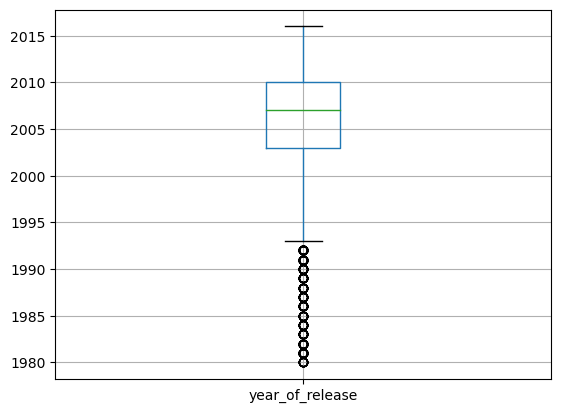

In [15]:
data.boxplot(column=['year_of_release']);
data['year_of_release'].value_counts().describe()

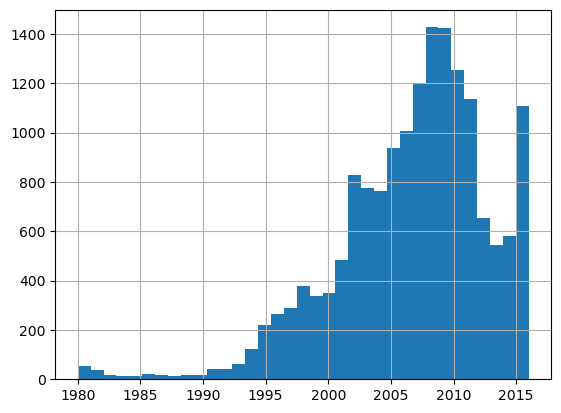

In [16]:
data['year_of_release'].hist(bins=35);

In [17]:
data['year_of_release'].value_counts().head(10)

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
Name: year_of_release, dtype: int64

It follows from the graphs: 
- A total of 37 years of data are considered.
- on average 338 games were released per year.
- you can ignore data from before 1994 - you can clearly see it in the "Spread" chart (from 1980 to 1994 less than 60 games were released per year)
- the largest number of games were released in 2008 (1427 games) and 2009 (1426 games), this peak was followed by a decline, which can be associated with more work on the quality of games and, accordingly, the increased time interval between releases, and the share of console games may have decreased due to the increasing number of mobile applications.

- **Let's analyze the change in sales by platform. Let's choose the platforms with the highest total sales and plot the distribution by year. Let's find out over what characteristic period new platforms appear and old ones disappear**.

Let's see what kinds of platforms are contained in the data:

In [18]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Let's group the data by platform and its total sales and see on the graph which platforms were the most successful in terms of game sales for the entire period of time:

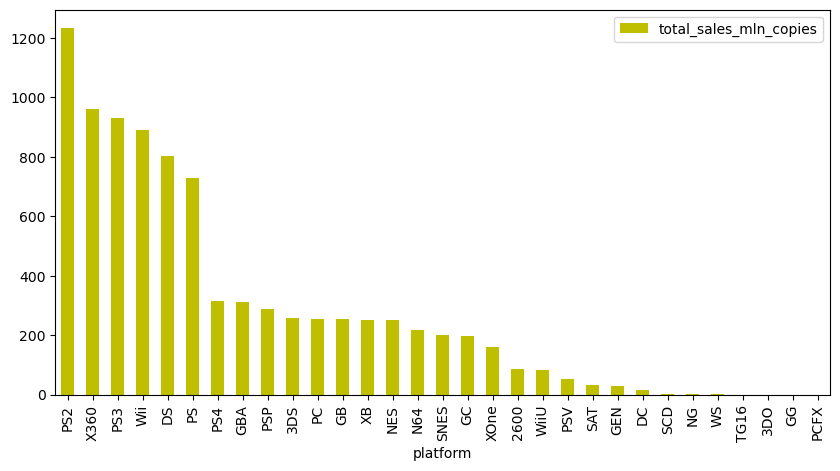

In [19]:
data.groupby('platform').agg({'total_sales_mln_copies':'sum'})\
.sort_values('total_sales_mln_copies',ascending=False)\
.plot(kind='bar',figsize=(10,5), color = 'y');

The largest number of copies were sold on the PS2, X360, PS3, Wii, DS, and PS platforms. Half of the platforms in the top belongs to Sony, including the first place in sales of all time (PS2). Let's look at these platforms in more detail, for this purpose we build separate bar charts for each of them:

In [20]:
def platform_hist (name,title):
    data[data['platform'] == name]\
        .groupby('year_of_release')\
        .agg({'total_sales_mln_copies':'sum'})\
        .plot(kind='bar', figsize=(6,5))
    plt.title(title)

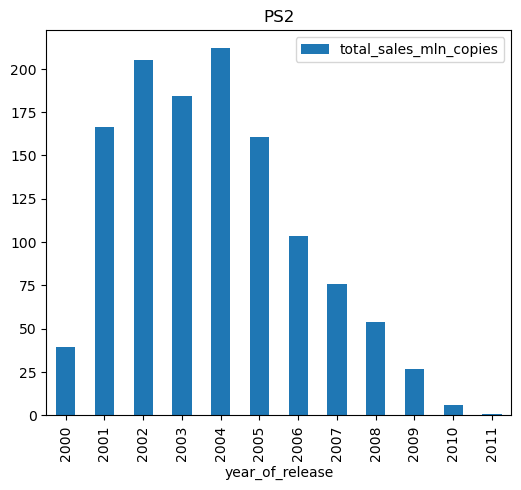

In [21]:
platform_hist('PS2','PS2')

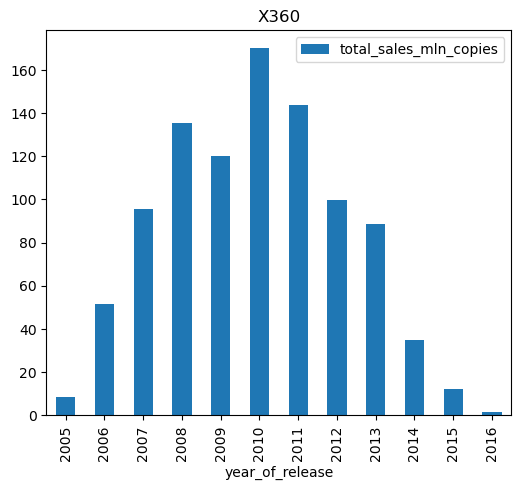

In [22]:
platform_hist('X360','X360')

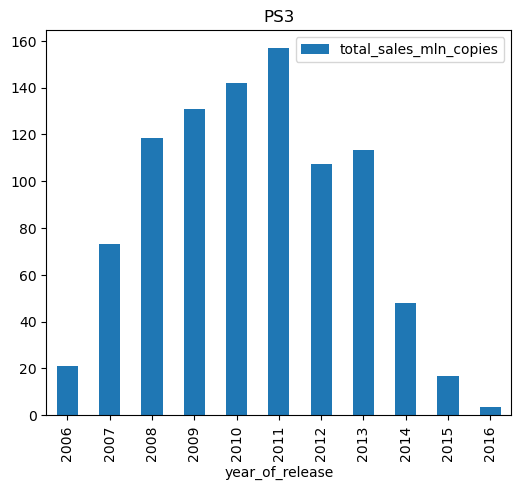

In [23]:
platform_hist('PS3','PS3')

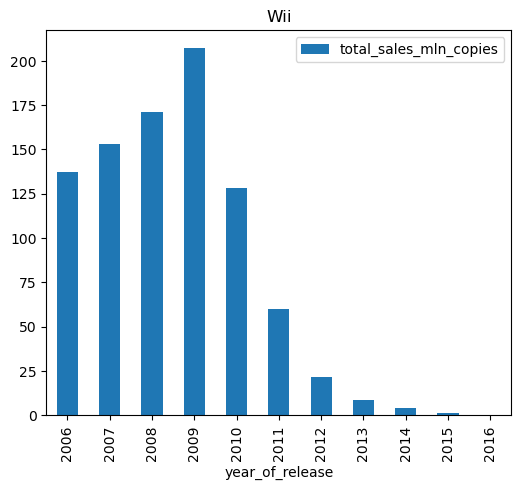

In [24]:
platform_hist('Wii','Wii')

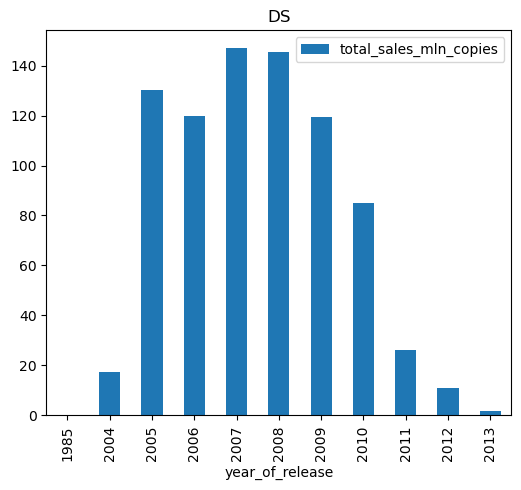

In [25]:
platform_hist('DS','DS')

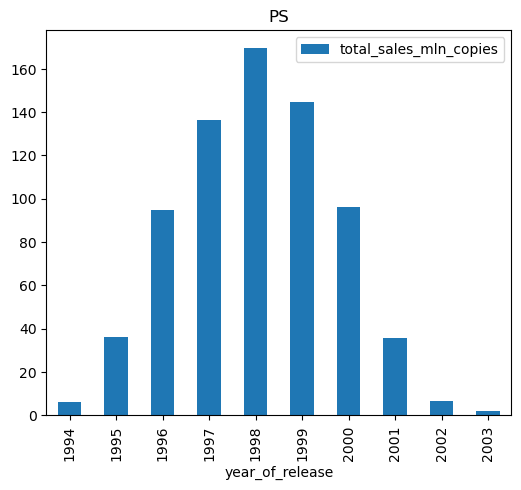

In [26]:
platform_hist('PS','PS')

On average each platform existed for 10 years, peak sales occur on average in 4 years from the release date. In the example of Sony, there is a pattern - when sales drop, a new platform is released, for example, the drop in sales of PS2 was in 2005 and in 2006 a new platform PS3 was released. Sony takes half of the leading position. Let's graph the growth and decline in sales between different platforms within the same company. The data will help us to orient for what period it is worth to take the actual data and work with them.Let's define the actual period, which will help to build a forecast for 2017.

In [27]:
PS = data[data['platform'] == 'PS']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales_mln_copies':'sum'})
PS2 = data[data['platform'] == 'PS2']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales_mln_copies':'sum'})
PS3 = data[data['platform'] == 'PS3']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales_mln_copies':'sum'})
PS4 = data[data['platform'] == 'PS4']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales_mln_copies':'sum'})

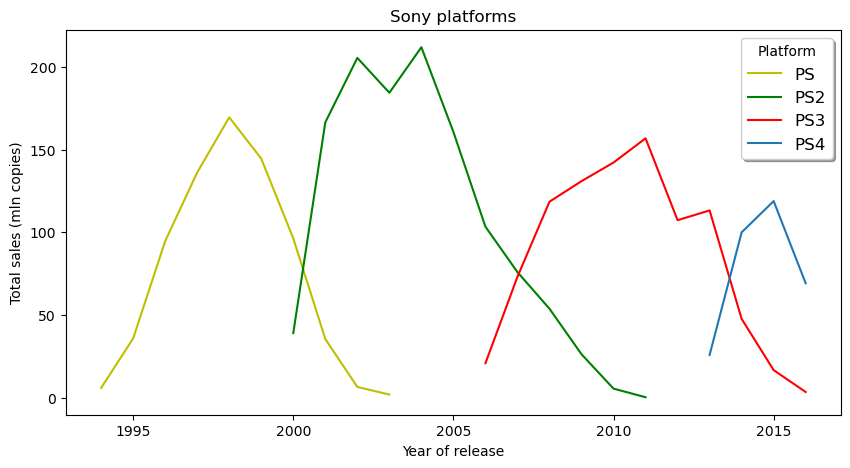

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(PS.year_of_release, PS.total_sales_mln_copies, 'y',
         PS2.year_of_release, PS2.total_sales_mln_copies, 'g',
         PS3.year_of_release, PS3.total_sales_mln_copies, 'r',
         PS4.year_of_release, PS4.total_sales_mln_copies)
plt.title('Sony platforms')
plt.legend(['PS','PS2', 'PS3', 'PS4'], fontsize=12, shadow=True, title='Platform')
plt.xlabel('Year of release')
plt.ylabel('Total sales (mln copies)');

Let's take a look at the chart of the different platforms within Microsoft

In [29]:
XB = data[data['platform'] == 'XB']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales_mln_copies':'sum'})
X360 = data[data['platform'] == 'X360']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales_mln_copies':'sum'})
XOne = data[data['platform'] == 'XOne']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales_mln_copies':'sum'})

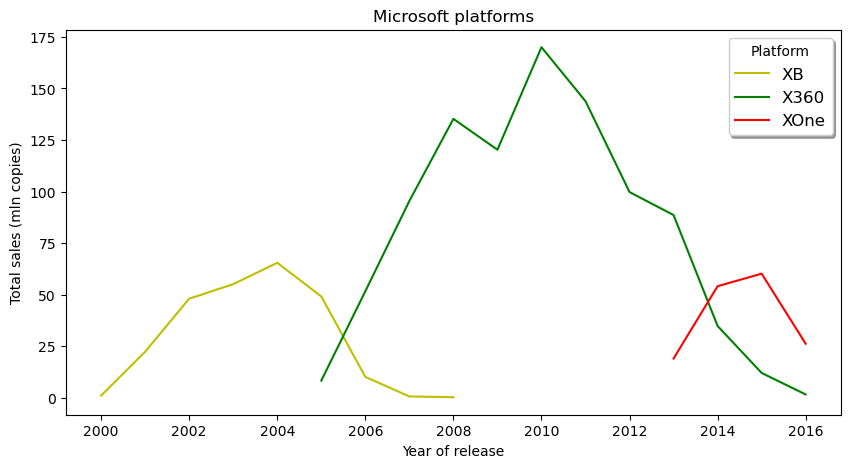

In [30]:
plt.figure( figsize=(10, 5))
plt.plot(XB.year_of_release, XB.total_sales_mln_copies, 'y',
         X360.year_of_release, X360.total_sales_mln_copies, 'g',
         XOne.year_of_release, XOne.total_sales_mln_copies, 'r')
plt.title('Microsoft platforms')
plt.legend(['XB','X360', 'XOne'], fontsize=12, shadow=True, title='Platform')
plt.xlabel('Year of release')
plt.ylabel('Total sales (mln copies)');

The regularity of Microsoft's release of new platforms is the same as Sony's. When sales of an old platform decline, a new one appears. Based on the fact that the life cycle of platforms is 10 years, and their peak is in the fourth year of sales, to objectively make a forecast for 2017 - let's take the data from 2014. This is the year when there is a noticeable increase in new platform sales and a decline in older platforms. Earlier periods do not make sense to analyze, because their peak sales will occur after 4 years and in 2017 will begin to decline, the benefits from the promotion of such platforms will be less than from the new generations.

- **Create a new dataframe with the current period and see the distribution of platforms by total sales for 2014-2016:**

In [31]:
actual_data = data[data['year_of_release'] >= 2014]

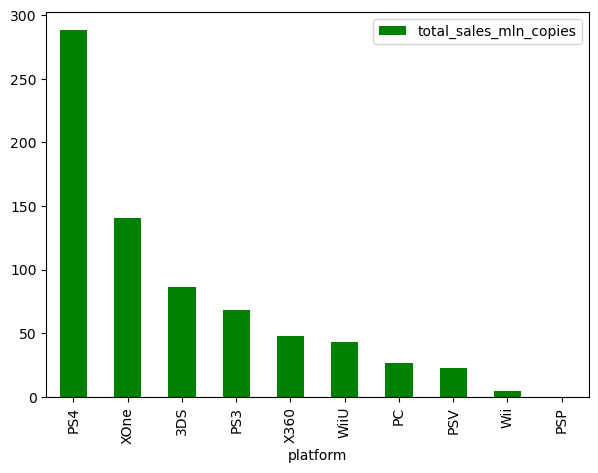

In [32]:
actual_data.groupby('platform').agg({'total_sales_mln_copies':'sum'})\
.sort_values('total_sales_mln_copies',ascending=False)\
.plot(kind='bar',figsize=(7,5), color = 'g');

- **Let's look at the distribution of each platform within one year of the current period to identify sales leaders and select potentially profitable platforms:**

In [33]:
def platform_by_year (year,title):
    actual_data[actual_data['year_of_release'] == year]\
    .groupby('platform')\
    .agg({'total_sales_mln_copies':'sum'})\
    .sort_values('total_sales_mln_copies', ascending=False)\
    .plot(kind='bar', figsize=(7,5))
    plt.title(title)

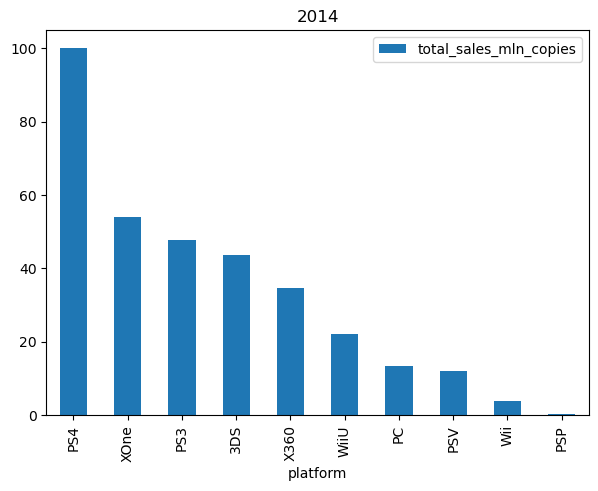

In [34]:
platform_by_year(2014,2014)

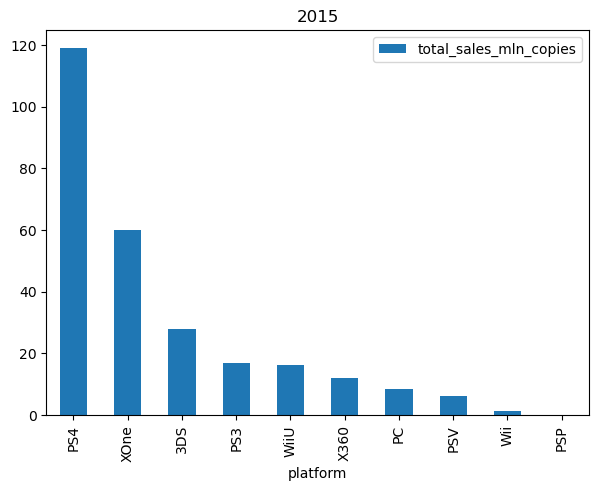

In [35]:
platform_by_year(2015,2015)

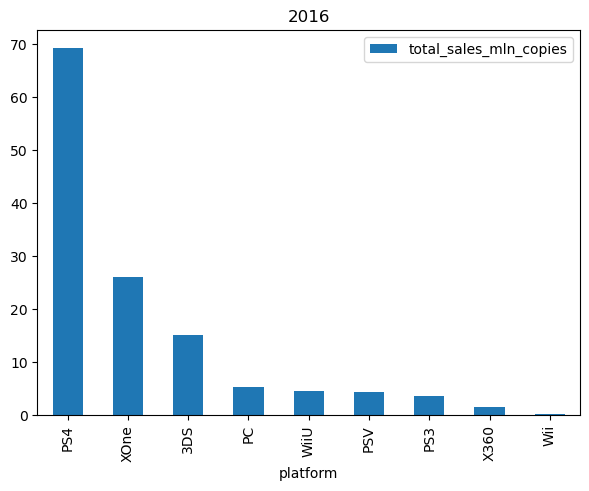

In [36]:
platform_by_year(2016,2016)

From the data obtained, it follows that the PS4 platform takes the leading position for the selected current period, the second place with a noticeable lag is occupied by the Xone platform. The third place in 2014 was occupied by PS3, but since it was displaced by PS4, since 2015 its sales decreased significantly and it was replaced by 3DS, which has been in the third place since 2015. Let's look at each of these platforms on the charts within the current period

In [37]:
PS4 = actual_data[actual_data['platform'] == 'PS4']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales_mln_copies':'sum'})
XOne = actual_data[actual_data['platform'] == 'XOne']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales_mln_copies':'sum'})
DS3 = actual_data[actual_data['platform'] == '3DS']\
    .groupby('year_of_release', as_index=False)\
    .agg({'total_sales_mln_copies':'sum'})

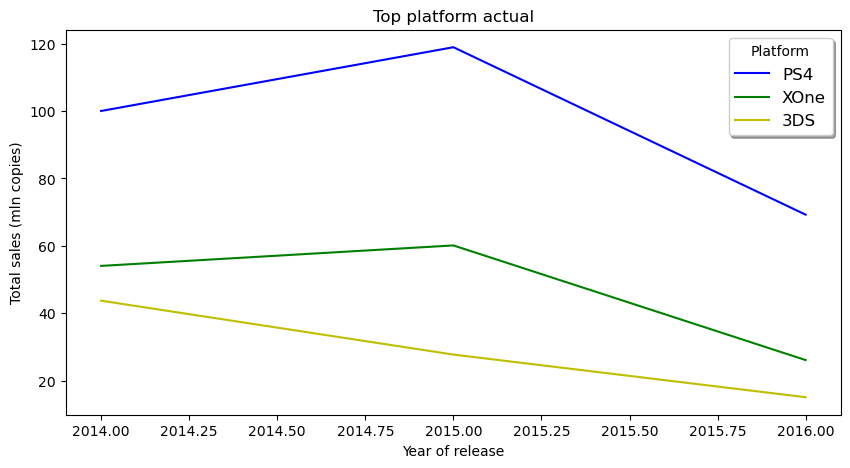

In [38]:
plt.figure( figsize=(10, 5))
plt.plot(PS4.year_of_release, PS4.total_sales_mln_copies, 'b',
         XOne.year_of_release, XOne.total_sales_mln_copies, 'g',
         DS3.year_of_release, DS3.total_sales_mln_copies, 'y')
plt.title('Top platform actual')
plt.legend(['PS4','XOne', '3DS'], fontsize=12, shadow=True, title='Platform')
plt.xlabel('Year of release')
plt.ylabel('Total sales (mln copies)');

On the graph you can see the growth of PS4 and XOne platforms with a peak in 2015 and a further decline in sales in 2016, this may be due to the general decline in the industry mentioned earlier, as well as the fact that the data for 2016 is not complete, so it is impossible to say with certainty that these leading platforms became less in demand. As for 3DS, its decline has been flat since 2014 and investing in advertising on this platform is potentially not profitable. So we chose two potentially profitable platforms - PS4 and XOne.

- **Let's chart a "mustache box" of global game sales by platform**

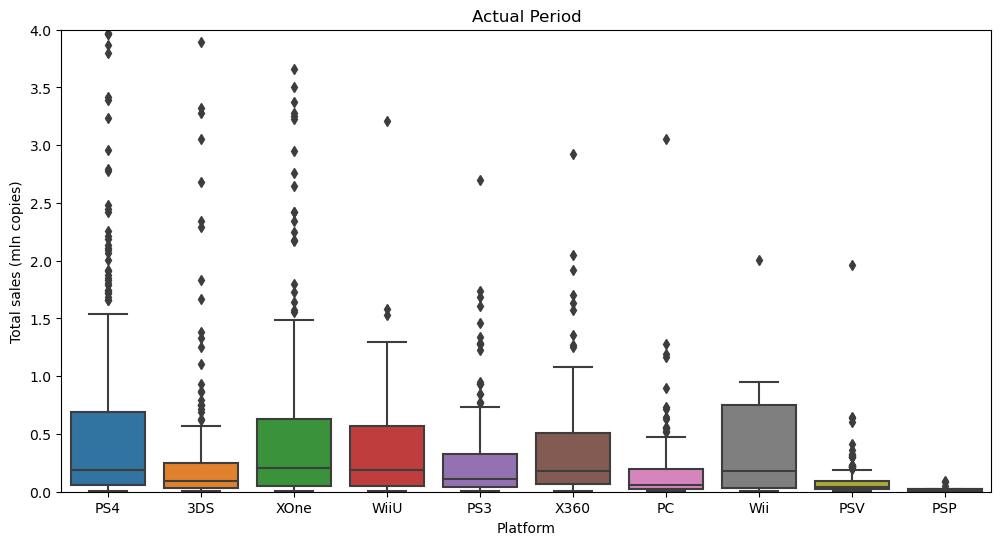

In [39]:
plt.figure(figsize=(12,6))
sbrn.boxplot(x='platform', y='total_sales_mln_copies', data=actual_data)
plt.xlabel('Platform')
plt.ylabel('Total sales (mln copies)')
plt.title('Actual Period')
plt.ylim([0, 4]);

In [40]:
actual_data.groupby('platform')['total_sales_mln_copies'].agg(['count', 'mean', 'median'])

,count,mean,median
platform,,,
3DS,212,0.408868,0.090
PC,151,0.179139,0.060
PS3,219,0.311324,0.110
PS4,376,0.766356,0.185
PSP,13,0.027692,0.020
PSV,295,0.075932,0.040
Wii,11,0.460909,0.180
WiiU,73,0.588767,0.190
X360,111,0.434414,0.180


The graph confirms the previous conclusions about the leading positions of PS4 and XOne, but it is worth noting the average sales of X360 and WiiU platforms, which are close to the leaders. The Wii platform also stands out on the chart with the same median as the X360, but since the number of games on Wii for the current period is 11, and the new WiiU platform is gaining momentum, it makes no sense to focus on the old Wii platform

- **Let's look at the impact on sales within one popular platform of user reviews and critics, also build a scatter plot and calculate the correlation between reviews and sales.**

Consider the relationship between sales and reviews, using the PS4 as an example:

,total_sales_mln_copies,critic_score_out_of_100,user_score_out_of_10
total_sales_mln_copies,1.000000,0.402661,-0.040132
critic_score_out_of_100,0.402661,1.000000,0.546434
user_score_out_of_10,-0.040132,0.546434,1.000000


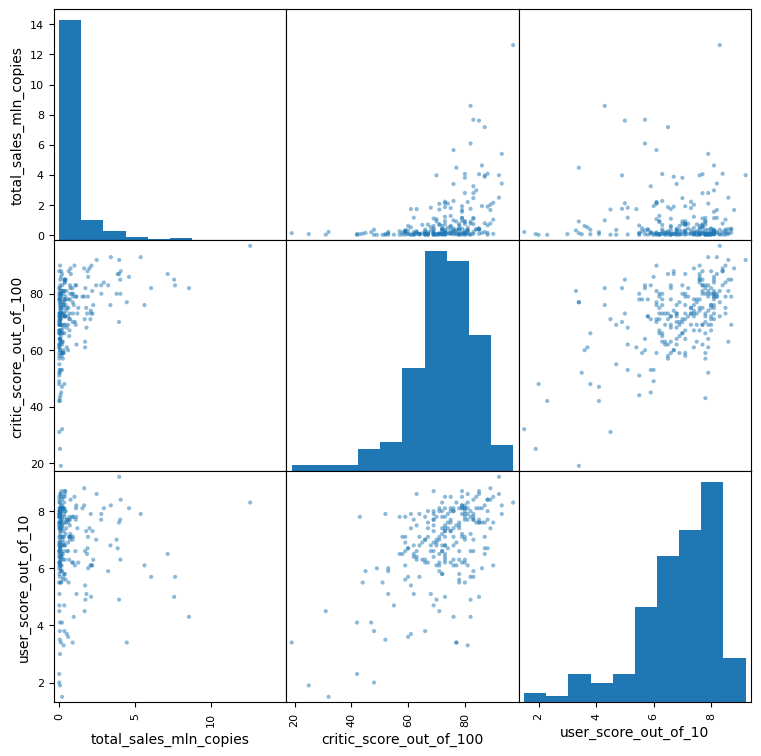

In [41]:
ps4_sales_score = actual_data[actual_data['platform'] == 'PS4']
ps4_sales_score = \
ps4_sales_score[['total_sales_mln_copies', 'critic_score_out_of_100', 'user_score_out_of_10']]
pd.plotting.scatter_matrix(ps4_sales_score, figsize=(9, 9));
ps4_sales_score.corr()

The graphs show that the relationship between critics' reviews and sales is weak (0.4), and there is no relationship between users' reviews and sales (-0.04). From this we can conclude that user reviews have no effect on game sales, while critics' reviews have an effect, but a very weak one. Let's check this conclusion on the example of other platforms:

,total_sales_mln_copies,critic_score_out_of_100,user_score_out_of_10
total_sales_mln_copies,1.000000,0.309474,-0.023478
critic_score_out_of_100,0.309474,1.000000,0.485783
user_score_out_of_10,-0.023478,0.485783,1.000000


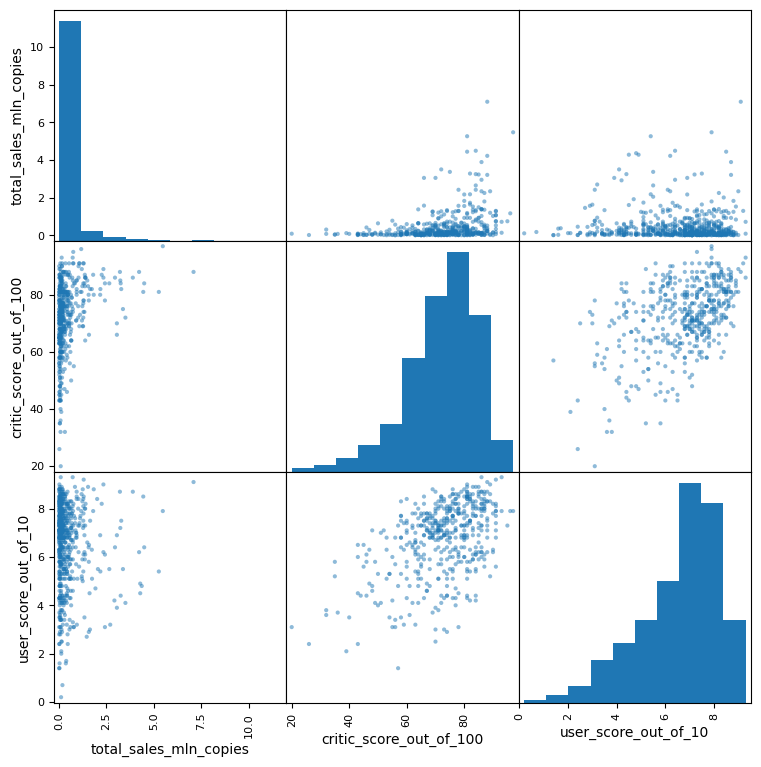

In [42]:
actual_data_without_ps4 = actual_data[actual_data['platform'] != 'PS4']
total_sales_score = \
actual_data_without_ps4[['total_sales_mln_copies', 'critic_score_out_of_100', 'user_score_out_of_10']]
pd.plotting.scatter_matrix(total_sales_score, figsize=(9, 9));
total_sales_score.corr()

The conclusion was confirmed, user reviews have no effect on game sales (-0.02), and critic reviews have a negligible effect, the correlation is weak (0.3).

- **Look at the overall distribution of games by genre, identify the most profitable genres, and see if the genres with high and low sales stand out.

,count,mean,median
genre,,,
Action,619,0.322068,0.090
Role-Playing,221,0.459005,0.110
Adventure,185,0.094865,0.030
Sports,161,0.680000,0.180
Shooter,128,1.335469,0.515
Misc,113,0.332301,0.090
Racing,69,0.398841,0.090
Fighting,60,0.470333,0.125
Simulation,44,0.298409,0.100


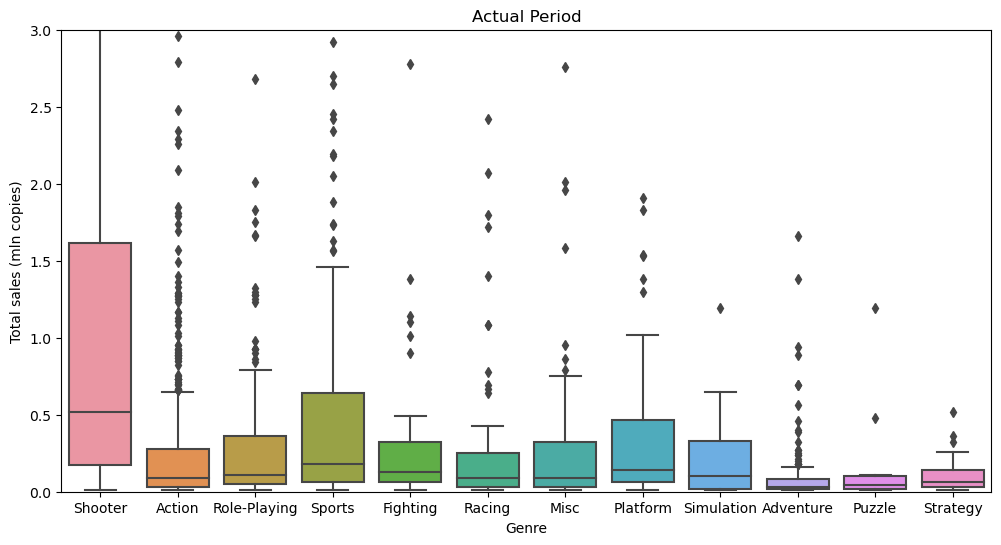

In [43]:
plt.figure(figsize=(12,6))
sbrn.boxplot(x='genre', y='total_sales_mln_copies', data=actual_data)
plt.xlabel('Genre')
plt.ylabel('Total sales (mln copies)')
plt.title('Actual Period')
plt.ylim([0, 3]);
actual_data.groupby('genre')['total_sales_mln_copies'].agg(['count', 'mean', 'median'])\
.sort_values('count',ascending=False)

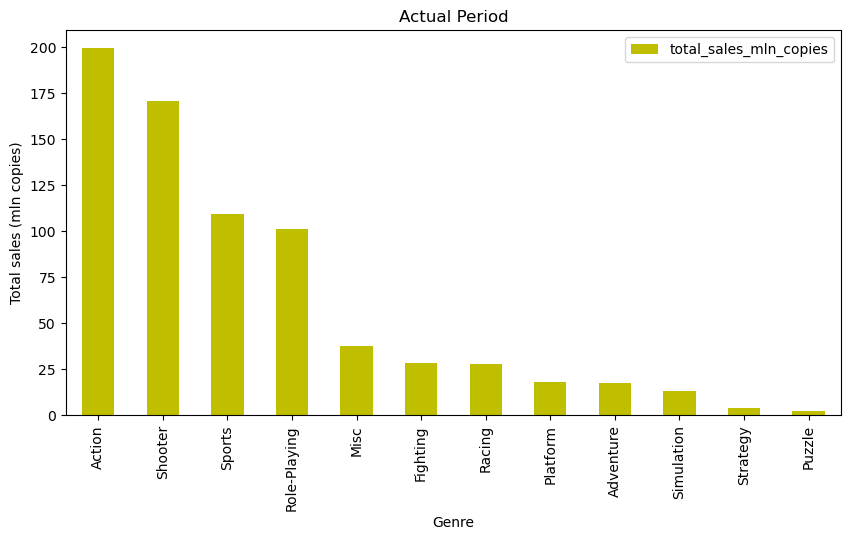

In [44]:
actual_data.groupby('genre').agg({'total_sales_mln_copies':'sum'})\
.sort_values('total_sales_mln_copies',ascending=False)\
.plot(kind='bar',figsize=(10,5), color = 'y');
plt.xlabel('Genre')
plt.ylabel('Total sales (mln copies)')
plt.title('Actual Period');

It follows from the data that the most produced genre on all platforms of the current period is Action, followed by Role-Playing and Adventure. The least released are Puzzle, Strategy and Platform genres. At the same time, the Action, Shooter and Sports genres have the most copies sold, while Puzzle, Strategy and Simulation have the least number of copies sold. The Shooter genre leads in terms of average sales. In general we can conclude that more intelligent games are less profitable, this can be explained by simpler graphics and less activity in the game itself compared to Action and Shooter. Overall, the distribution looks quite logical.

**Conclusion:** 
- the largest number of games were released in 2008 (1427 games) and 2009 (1426 games), this peak was followed by a decline, which can be attributed to more work on the quality of games and accordingly a longer time interval between releases, and also the share of console games may have decreased due to the increase in the number of mobile applications;
- PS2, X360, PS3, Wii, DS, PS sold the most number of copies over all time. Half of the platforms in the top are owned by Sony, including the number one seller of all time (PS2);
- On average, each platform has been around for 10 years, with peak sales averaging 4 years from release date. Sony example shows the following pattern: when the sales drop, new platform is released, for example PS2 sales recession happened in 2005 and in 2006 new platform PS3 was released. The regularity of the release of the new platforms from Microsoft is the same as for Sony. With the decline in sales of the old platform, a new one appears. Based on the fact that the life cycle of platforms is 10 years, and their peak is in the fourth year of sales, to objectively make a forecast for 2017 for the current period took the data from 2014. This is the year when there is a noticeable increase in new platform sales and a decline in older platforms. Earlier periods do not make sense to analyze, because their peak sales will occur after 4 years and in 2017 will begin to decline, the benefits from the promotion of such platforms will be less than from the new generations;
- The two potentially profitable platforms are the PS4 and XOne. Both platforms have peak sales in 2015 and a further decline in sales in 2016, this could be due to the general decline in the industry mentioned earlier, and also the fact that the data for 2016 is not complete, so it cannot be said with certainty that these leading platforms have become less in demand;
- user reviews do not affect game sales, and critics' reviews do, but very little;
- the most released genre on all platforms of the current period is Action, followed by Role-Playing and Adventure. The least-released genres are Puzzle, Strategy, and Platform. At the same time, the Action, Shooter and Sports genres have the most copies sold, while Puzzle, Strategy and Simulation have the least number of copies sold. The Shooter genre leads in average sales. Potentially profitable genres are Action, Shooter and Sports.

## Let's build a user profile for each region

- **For each region (NA, EU, JP) let's define the most popular platforms (top 5) and describe the differences in the share of sales.**

In [45]:
def top_sales_region(group, region, xlabel, title):
    data = actual_data.groupby(group, as_index=False).agg({region:'sum'})\
    .sort_values(region, ascending=False)
    data['share'] = data[region] / data[region].sum()*100
    print(data.head())
    fig, ax = plt.subplots(figsize=(8,4))
    sbrn.barplot(ax=ax, x = group, y = data['share'], data = data.head())
    plt.xlabel(xlabel)
    plt.ylabel('Sales share')
    plt.title(title)

  platform  na_sales_mln_copies      share
3      PS4                98.61  34.714497
9     XOne                81.27  28.610153
8     X360                28.30   9.962684
0      3DS                22.64   7.970147
2      PS3                22.05   7.762445


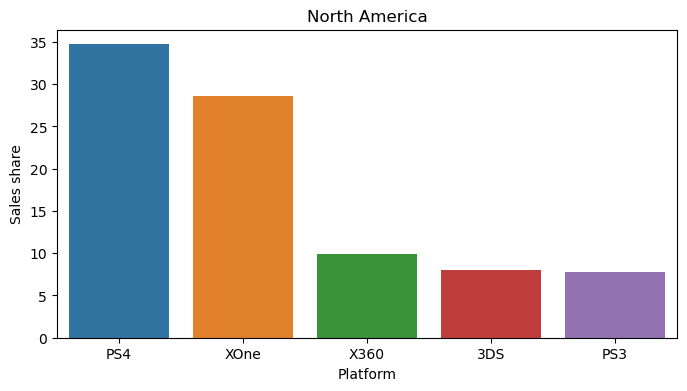

In [46]:
top_sales_region('platform', 'na_sales_mln_copies','Platform', 'North America')

In North America, the leading position is held by PS4 with a market share of 34.7%, but it is worth noting that XOne is not far behind and has 28.6% of the market.

  platform  eu_sales_mln_copies      share
3      PS4               130.04  48.041968
9     XOne                46.25  17.086597
2      PS3                25.54   9.435496
1       PC                17.97   6.638836
0      3DS                16.12   5.955372


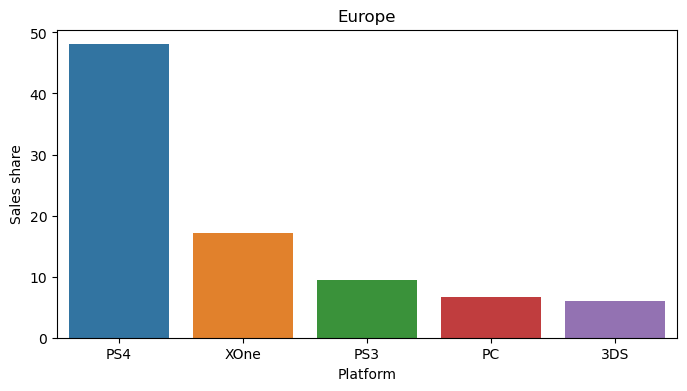

In [47]:
top_sales_region('platform', 'eu_sales_mln_copies','Platform', 'Europe')

In Europe, the PS4 also has a large market share (48%), but significantly ahead of the XOne (17%)

  platform  jp_sales_mln_copies      share
0      3DS                44.24  47.523902
3      PS4                15.02  16.134923
5      PSV                14.54  15.619293
2      PS3                11.22  12.052852
7     WiiU                 7.31   7.852616


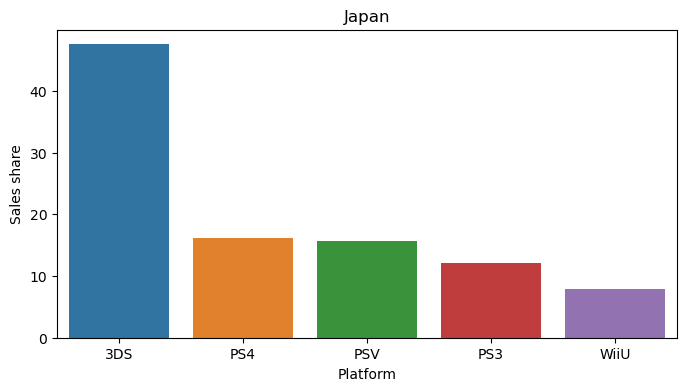

In [48]:
top_sales_region('platform', 'jp_sales_mln_copies','Platform', 'Japan')

In Japan the situation is not similar to the previous two regions, here 3DS is leading (which is logical, the manufacturer of this platform is Japanese company Nintendo) with 47.5% market share, while PS4 is much less popular (16% market share) and it is worth mentioning that almost on a par with the second place in market share is PSV (15.6%). It is worth noting that the XOne was not included in the top 5, the first and last places in the top are occupied by Japanese platform makers, the rest are occupied by different Sony platforms.

- **Now let's identify the most popular genres (top 5)**

           genre  na_sales_mln_copies      share
8        Shooter                79.02  27.818067
0         Action                72.53  25.533338
10        Sports                46.13  16.239527
7   Role-Playing                33.47  11.782722
3           Misc                15.05   5.298176


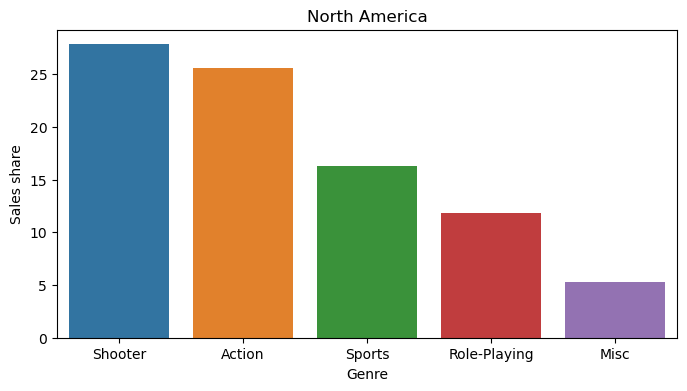

In [49]:
top_sales_region('genre', 'na_sales_mln_copies','Genre', 'North America')

In North America, the genre Shooter leads (27.8%), Action (25.5%) and Sports (16.2%) rounds out the top three, with Role-Playing (11.8%) and Misc (5.2%) making up the remainder of the top five.

           genre  eu_sales_mln_copies      share
0         Action                74.68  27.589774
8        Shooter                65.52  24.205704
10        Sports                45.73  16.894488
7   Role-Playing                28.17  10.407123
6         Racing                14.13   5.220186


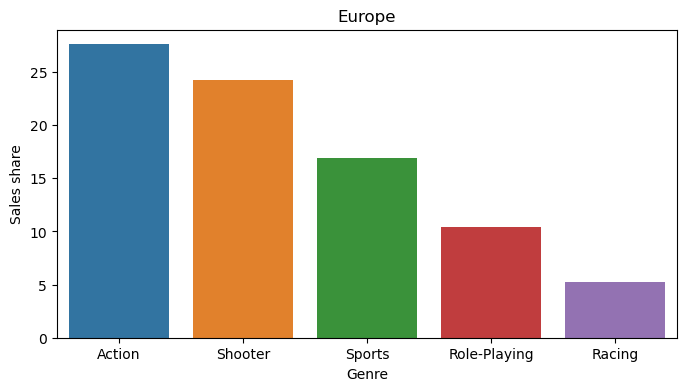

In [50]:
top_sales_region('genre', 'eu_sales_mln_copies','Genre', 'Europe')

In Europe, too, Action (27.6%) and Shooter (24.2%) have the largest market share, but in contrast to America in Europe the Action genre is in first place. In third and fourth place also Sports (16.9%) and Role-Playing (10.4%), completes a top five genre Racing (5.2%)

          genre  jp_sales_mln_copies      share
7  Role-Playing                31.16  33.472983
0        Action                29.58  31.775701
2      Fighting                 6.37   6.842840
3          Misc                 5.61   6.026426
8       Shooter                 4.87   5.231496


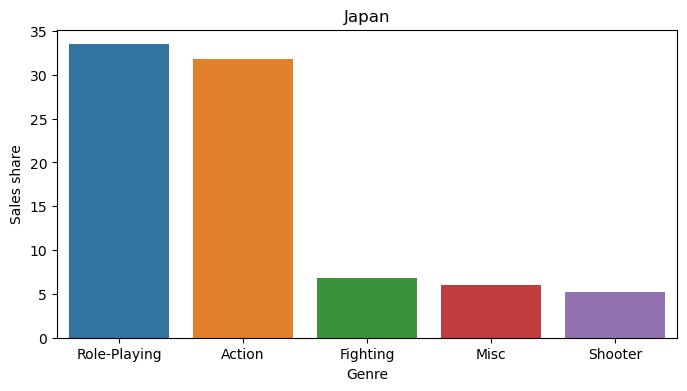

In [51]:
top_sales_region('genre', 'jp_sales_mln_copies','Genre', 'Japan')

In Japan, Role-Playing titles take the lead (33.5%) and Action titles lag a bit behind (31.8%). The shares of other genres in the top 5 are significantly lower and approximately equal: Fighting(6.8%), Misc(6%) and Shooter(5.2%).

- **Determine if the ESRB rating affects sales in an individual region.**

Entertainment Software Rating Board is an association that determines the age rating of computer games. The ESRB evaluates game content and assigns it an appropriate age category, such as "For Adults," "For Young Children," or "For Teens. Below is a description of each rating item:
- **EC** (Early childhood) - 'for young children': the game is appropriate for children ages 3 and up and contains no content that parents might find inappropriate;
- **E** (Everyone): 'for everyone': the content is suitable for all ages. These games may be enjoyed by adults as well. Originally called **K-A** (Kids to Adults);
- **E10+** (Everyone 10 and older): projects with this rating may contain either a bit more cartoon or mild violence, or slightly explicit scenes, or a minimal amount of blood;
- **T** (Teen) - 'to teens': the game is suitable for ages 13 and up. Projects in this category may contain violence, obscene scenes, crude humor, moderately explicit sexual content, blood or the occasional use of profanity;
- **M** (Mature): the game content is not suitable for under 17 years old. Projects with this rating may contain sufficiently violent violence, large amounts of blood with dismemberment, obscene sexual scenes or crude profanity that is undesirable to younger audiences;
- **AO** (Adults Only 18+): games content is for adults over the age of 18 only. Products in this category may contain extended scenes of brutal violence and/or very explicit sexual content as well as nude scenes;
- **RP** (Rating Pending): The product has been sent to the ESRB and is awaiting a rating. This logo is used only on promotional presentations and demos before the official release date;
- **RP 17+** (Rating Pending) - 'rating pending - approximately 17+': The product has been sent to the ESRB for evaluation, but the approximate content is close to a rating of **M**.

First, let's look at the shares of the ratings of all regions for the current period:

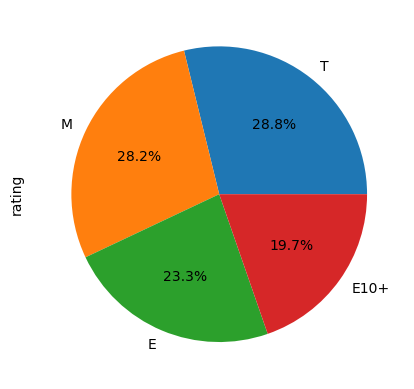

In [52]:
actual_data['rating'].value_counts().plot(kind='pie', autopct='%1.1f%%');

In this current period, games are divided into 4 age groups 'games for teens' and 'adult' take 28% of the total number of games, followed by 'games for everyone' with a share of 23% and in last place 'games for everyone from 10 years and older'. Now let's see if the ranking has an impact on sales by region

  rating  na_sales_mln_copies      share
2      M                96.42  43.959150
0      E                50.74  23.133035
3      T                38.95  17.757819
1   E10+                33.23  15.149995


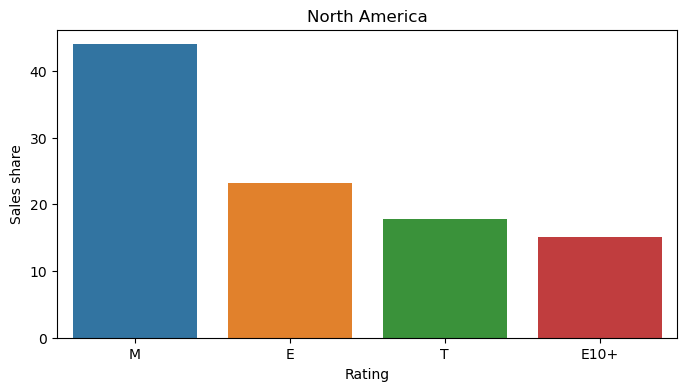

In [53]:
top_sales_region('rating', 'na_sales_mln_copies','Rating', 'North America')

  rating  eu_sales_mln_copies      share
2      M                93.44  44.131677
0      E                58.06  27.421716
3      T                34.07  16.091248
1   E10+                26.16  12.355358


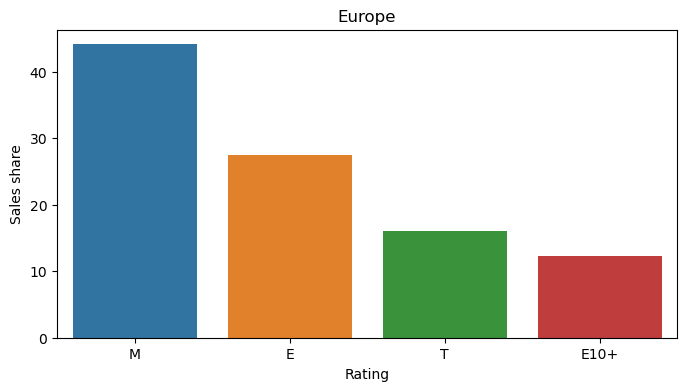

In [54]:
top_sales_region('rating', 'eu_sales_mln_copies','Rating', 'Europe')

  rating  jp_sales_mln_copies      share
3      T                14.78  40.840011
0      E                 8.94  24.702957
2      M                 8.01  22.133186
1   E10+                 4.46  12.323846


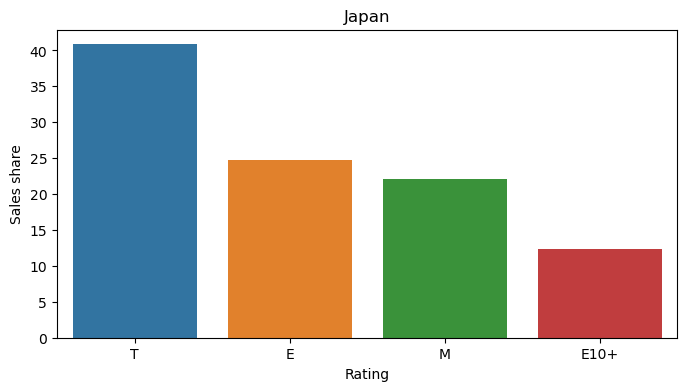

In [55]:
top_sales_region('rating', 'jp_sales_mln_copies','Rating', 'Japan')

From the data it follows that in North America and Europe the largest share of sold games belongs to the category with **M** rating (44%), in Japan the situation is different, the first place is taken by games with **T** rating (41%). The second place in all three regions belongs to games rated **E** (~25%). The situation with the third(**T**) and fourth(**E10+**) place is similar in North America and Europe, the shares are about the same. In Japan, the shares are the other way round, the third place goes to **M**(22%) and the fourth **E10+**(12%).

**Conclusion:** 
- In North America, the top five most popular platforms are PS4(34.7%), XOne(28.6%), X360(10%), 3DS(8%) and PS3(8%). By genre, Shooter leads(27.8%), Action(25.5%) comes in second place with a slight lag and Sports(16.2%) completes the top three, the remaining shares in the top 5 belong to Role-Playing(11.8%) and Misc(5.2%), and the largest share of sold games belongs to the M-rated category(44%), E-rated games come second (25%), T third (18%) and fourth E10+(15%). Thus the most probable portrait of users from North America is adults older than 17 years old who prefer to play Shooter and Action games on PS4 and Xone.
- In Europe, the top 5 most popular platforms are PS4 (48%), XOne (17%), PS3 (9.4%), PC (6.6%) and 3DS (6%). In terms of genres, Action takes the lead (27.6%), followed by Shooter (24%) and Sports (16.9%), with Role-Playing (10.4%) and Racing (5.2%) making up the top 5, while M-rated games (44%) have the highest percentage of sales, E-rated games ranking second (27.4%), T third (16%) and E10+ fourth (12%). Thus, the most likely portrait of users from Europe is the adults over 17 years old who prefer Action and Shooter games on PS4.
- In Japan, the top 5 most popular platforms are 3DS(47.5%), PS4(16.1%), PSV(15.6%), PS3(12%) and WiiU(7.8%). In terms of genres, Role-playing leads (33.5%), Action genre(31.7%) comes second with a slight lag and Fighting genre(6.8%) completes the top three, the remaining shares in the top 5 belong to Misc(6%) and Shooter(5.2%), and the category rated T (40.8%) takes the largest share of games sold, E-rated games come second (24.7%), M (22.1%) third and E10+ fourth (12.3%). Thus, the most probable portrait of users from Japan is teenagers older than 13 years old who prefer Role-Playing and Action games on the 3DS platform.

So, the portrait of North American and European users have a lot of similarities and are similar on the whole, while the users from Japan differ a lot according to all the analyzed parameters, starting from the age category to the preferred game genres and platforms, this may be due to the peculiarities of the region, for instance the DS3 preferred by Japan belongs to the Japanese company Nintendo.

## Hypothesis testing

**Hypothesis 1: The average user ratings of Xbox One and PC platforms are the same**

- The null hypothesis is that the average user rating of the Xbox One platform **is equal** to the average user rating of the PC platform
- Alternate hypothesis - Average user rating for the Xbox One platform **is not equal** to the average user rating for the PC platform
- significance level **alpha = 0.05**
- Use Levene's test to examine equality of variance and then run a t-test to test the hypothesis

In [56]:
xbox_one = actual_data[actual_data['platform'] =='XOne']
xbox_one = xbox_one[xbox_one['user_score_out_of_10'].isnull() == False]
pc = actual_data[actual_data['platform'] =='PC']
pc = pc[pc['user_score_out_of_10'].isnull() == False]

LeveneResult(statistic=6.004772988517075, pvalue=0.014868430917663678)

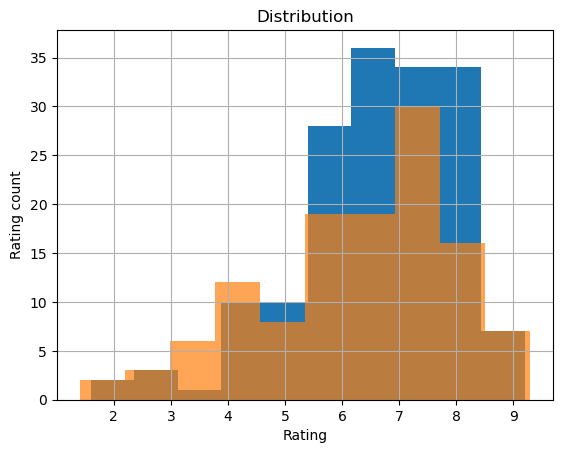

In [57]:
xbox_one.user_score_out_of_10.hist()
pc.user_score_out_of_10.hist(alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Rating count')
plt.title('Distribution');
st.levene(xbox_one.user_score_out_of_10, pc.user_score_out_of_10, center ='median')

P-value is less than alpha, i.e. we can assume that the variances of the general populations are different, which means that we should specify equal_var = False when calling the method scipy.stats.ttest_ind().

In [58]:
xbox_one = xbox_one['user_score_out_of_10']
pc = pc['user_score_out_of_10']
results = st.ttest_ind(xbox_one, pc, equal_var=False)
alpha = 0.05
print('p-value:', results.pvalue)
if (results.pvalue<alpha):
    print('Rejecting the null hypothesis')
else:
    print('It failed to reject the null hypothesis')

p-value: 0.11601398086668832
It failed to reject the null hypothesis


The resulting p-value suggests that the null hypothesis cannot be rejected because the p-value is greater than alpha. The data does not contradict the hypothesis 'average Xbox One user score equals average PC user score'.

**Hypothesis 2: The average user ratings for the Action and Sports genres are different.**

- The null hypothesis is that the average user rating for the Action genre **is equal** to the average user rating for the Sports genre
- Alternative hypothesis - Average user rating for Action genre **is not equal** to average user rating for Sports genre
- significance level **alpha = 0.05**
- use Levene's test to examine equality of variance and then run a t-test to test the hypothesis

In [59]:
action = actual_data[actual_data['genre'] =='Action']
action = action[action['user_score_out_of_10'].isnull() == False]
sports = actual_data[actual_data['genre'] =='Sports']
sports = sports[sports['user_score_out_of_10'].isnull() == False]

LeveneResult(statistic=21.607428421856284, pvalue=4.480161685830322e-06)

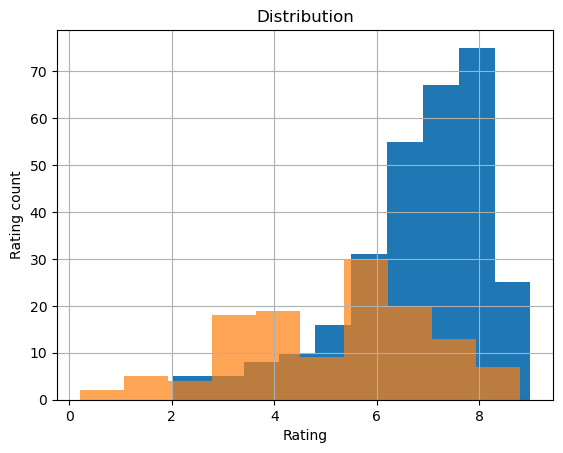

In [60]:
action.user_score_out_of_10.hist()
sports.user_score_out_of_10.hist(alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Rating count')
plt.title('Distribution');
st.levene(action.user_score_out_of_10, sports.user_score_out_of_10, center ='median')

P-value is larger than alpha, i.e. we have no reason to believe that the variances of the general populations are different, which means that specifying equal_var = False when calling the scipy.stats.ttest_ind() method is not necessary, because by default this parameter will take the value True.

In [61]:
action = action['user_score_out_of_10']
sports = sports['user_score_out_of_10']
results = st.ttest_ind(action, sports)
alpha = 0.05
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('It failed to reject the null hypothesis')

p-value: 2.8711147985105864e-19
Rejecting the null hypothesis


The result that the null hypothesis can be rejected means that the average user score for the Action genre is not equal to the average user score for the Sports genre.

**Conclusion:** the findings of the first hypothesis do not contradict the null hypothesis that the average user score for the Xbox One platform is equal to the average user score for the PC platform. This indicates that the original hypothesis is correct. The data from the second hypothesis allows you to reject the null hypothesis that the average user rating of the Action genre is equal to the average user rating of the Sports genre. This means that the original hypothesis was correct and the user ratings are indeed different.

### General conclusion

In the course of the study, the data were preprocessed, regularities were identified, data analysis was performed, a portrait of each region's user was compiled, hypotheses were formulated and the following conclusions were made:
- the largest number of games were released in 2008 (1427 games) and 2009 (1426 games), this peak was followed by a decline, which can be attributed to more work on the quality of games and, accordingly, a longer time interval between releases, and also the share of console games may have decreased due to an increase in mobile applications;
- PS2, X360, PS3, Wii, DS, PS sold the most number of copies over all time. Half of the platforms in the top are owned by Sony, including the number one seller of all time (PS2);
- On average, each platform has been around for 10 years, with peak sales averaging 4 years from release date. Sony example shows the following pattern: when the sales drop, new platform is released, for example PS2 sales recession happened in 2005 and in 2006 new platform PS3 was released. The regularity of the release of the new platforms from Microsoft is the same as for Sony. With the decline in sales of the old platform, a new one appears. Based on the fact that the life cycle of platforms is 10 years, and their peak is in the fourth year of sales, to objectively make a forecast for 2017 for the current period took the data from 2014. This is the year when there is a noticeable increase in new platform sales and a decline in older platforms. Earlier periods do not make sense to analyze, because their peak sales will occur after 4 years and in 2017 will begin to decline, the benefits from the promotion of such platforms will be less than from the new generations;
- The two potentially profitable platforms are the PS4 and XOne. Both platforms have peak sales in 2015 and a further decline in sales in 2016, this could be due to the general decline in the industry mentioned earlier, and also the fact that the data for 2016 is not complete, so it cannot be said with certainty that these leading platforms have become less in demand;
- user reviews do not affect game sales, and critics' reviews do, but very little;
- the most released genre on all platforms of the current period is Action, followed by Role-Playing and Adventure. The least-released genres are Puzzle, Strategy, and Platform. At the same time, the Action, Shooter and Sports genres have the most copies sold, while Puzzle, Strategy and Simulation have the least number of copies sold. The Shooter genre leads in average sales. Potentially profitable genres are Action, Shooter and Sports.
- In North America, the top five most popular platforms are PS4 (34.7%), XOne (28.6%), X360 (10%), 3DS (8%) and PS3 (8%). By genre, Shooter leads(27.8%), Action(25.5%) comes in second place with a slight lag and Sports(16.2%) completes the top three, the remaining shares in the top 5 belong to Role-Playing(11.8%) and Misc(5.2%), and the largest share of sold games belongs to the M-rated category(44%), E-rated games come second (25%), T third (18%) and fourth E10+(15%). Thus the most probable portrait of users from North America is adults older than 17 years old who prefer to play Shooter and Action games on PS4 and Xone.
- In Europe, the top 5 most popular platforms are PS4 (48%), XOne (17%), PS3 (9.4%), PC (6.6%) and 3DS (6%). By genre, Action leads (27.6%), followed closely by Shooter (24%) and Sports (16.9%), with Role-Playing (10.4%) and Racing (5.2%) making up the top 5, while M-rated games (44%) account for the highest percentage of sales, E-rated games (27.4%) come in second, T (16%) and E10+ (12%) in fourth. Thus, the most likely portrait of users from Europe is the adults over 17 years old who prefer Action and Shooter games on PS4.
- In Japan, the top 5 most popular platforms are 3DS(47.5%), PS4(16.1%), PSV(15.6%), PS3(12%) and WiiU(7.8%). In terms of genres, Role-playing leads (33.5%), Action genre(31.7%) comes second with a slight lag and Fighting genre(6.8%) completes the top three, the remaining shares in the top 5 belong to Misc(6%) and Shooter(5.2%), and the category rated T (40.8%) takes the largest share of games sold, E-rated games come second (24.7%), M (22.1%) third and E10+ fourth (12.3%). Thus the most probable portrait of users from Japan is teenagers older than 13 years old who prefer Role-Playing and Action games on the 3DS platform.
- portraits of users from North America and Europe have many similar characteristics and are generally similar, while users from Japan differ greatly in all the analyzed parameters, ranging from the age category to the preferred genres of games and platforms, this may be due to the characteristics of the region, for example the DS3 preferred by the Japanese belongs to the Japanese company Nintendo.
- The findings of the first hypothesis do not contradict the null hypothesis that the average user rating of the Xbox One platform is equal to the average user rating of the PC platform. This indicates that the original hypothesis is correct. The data from the second hypothesis allows you to reject the null hypothesis that the average user rating of the Action genre is equal to the average user rating of the Sports genre. This means that the original hypothesis was correct and the user ratings are indeed different.